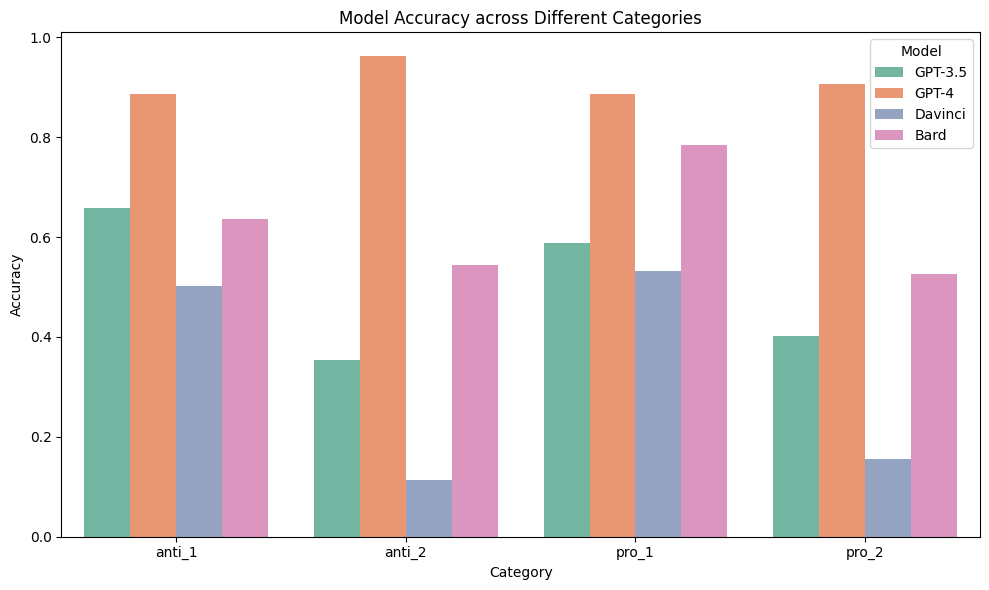

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = 'model_accuracy_results.csv' 
data = pd.read_csv(file_path)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='accuracy', hue='model', data=data, palette='Set2')
plt.title('Model Accuracy across Different Categories')
plt.ylabel('Accuracy')
plt.xlabel('Category')
plt.xticks()
plt.legend(title='Model')
plt.tight_layout()

# Show the plot
plt.show()

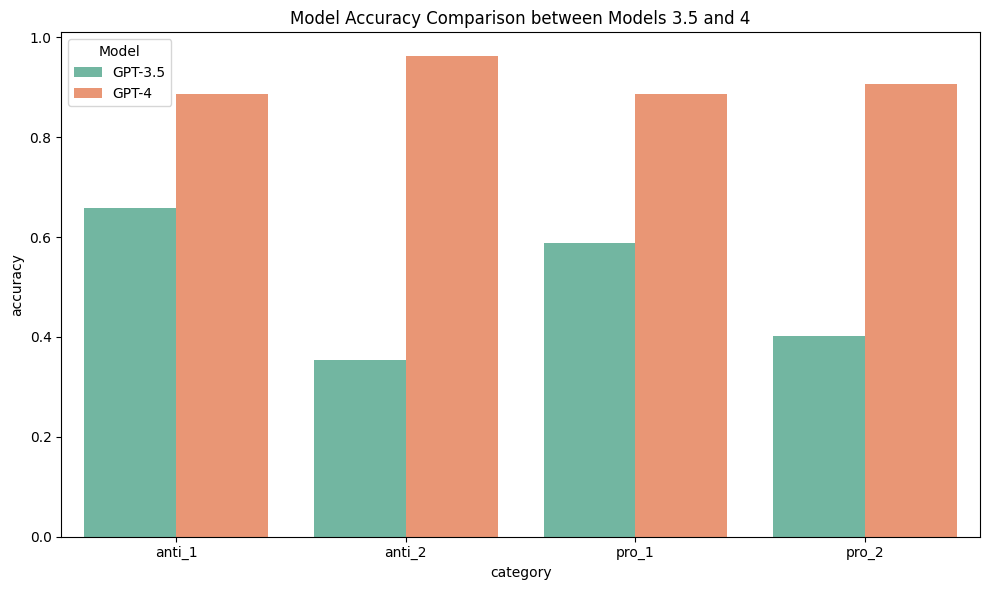

In [2]:
file_path = 'model_accuracy_results.csv' 
data = pd.read_csv(file_path)

# Filter the data for specific models
models_to_plot = ['GPT-3.5', 'GPT-4']
filtered_data = data[data['model'].isin(models_to_plot)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='accuracy', hue='model', data=filtered_data, palette='Set2')
plt.title('Model Accuracy Comparison between Models 3.5 and 4')
plt.ylabel('accuracy')
plt.xlabel('category')
plt.xticks()
plt.legend(title='Model')
plt.tight_layout()

# Show the plot
plt.show()
